# Statistical Testing

```{admonition} Learning Objectives
:class: tip

* Identify the components of hypothesis testing.
* Construct a hypothesis test for a scientific problem to determine if observations come from one of two distributions.
* Perform likelihood ratio test to evaluate hypothesis with a specific level of certainty.
```

## Statistical Hypothesis

In section [Parametric Distributions](../stats_03_parametric_distributions.ipynb) we discussed how several parametric models can "sort of fit" the empirical distribution. Now suppose that we want to limit the choices and we only want to compare two specific models and decide which one is "more probable". The two models can follow the same family of distributions but with two sets of parameters, for example, normal with two different means, or we can compare the normal distribution to some other non-symmetric distribution. Based on these two options, we can design two hypotheses: 

$\mathcal{H_0}: X \sim p_0(\theta_0),$

$\mathcal{H_1}: X \sim p_1(\theta_1),$

where $p_0(\theta_0)$ and $p_1(\theta_1)$ are the two different distributions with their corresponding parameters. $\mathcal{H}_0$ is referred to as the null hypothesis and $\mathcal{H}_1$ as the alternative hypothesis.

## Hypothesis Test

We would like to come up with a decision strategy based on which to determine if the data supports a certain hypothesis. A **hypothesis test** uses a **test statistic** which is a function of the sample, based on the outcome of which we can distinguish between the two hypotheses. If we assume that the null hypothesis is true, and calculate the distribution of the test statistics under the null hypothesis, we would like to reject the null hypothesis if we observe that the probability of the observed test statistic is low. The region for which the null hypothesis is rejected is called a **critical region**.

How can we come up with such a test statistic and the cutoff for rejection? We need to accepts that we will make some errors.


|Null hypothesis is | TRUE | FALSE|
|-------------------|------|------|
|Not Rejected| Correct| Type I Error |
|Rejected| Type II Error| Correct |


The probability of **Type I Error** is called a **significance level** and usually denoted by $\alpha$.

The probability of **Type II Error** is denoted by $\beta$, and the **power** of the test is $1-\beta$.

To design a "good test" one needs to juggle both errors.

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
# parameters for the hypothetical distributions
mu_0 = 0
mu_1 = 4

# significance level
alpha = 0.01


xrange = np.linspace(-5, 10, 1000)

null_likelihood = stats.norm.pdf(xrange, mu_0, 1)
alternative_likelihood = stats.norm.pdf(xrange, mu_1, 1)

In [3]:
def plot_decision_boundary(alpha):
    a = stats.norm.ppf(1-alpha, mu_0, 1)
    beta = stats.norm.cdf(a, mu_1, 1)


    plt.figure(figsize = (7, 3))
    plt.plot(xrange, null_likelihood, label="H_0")
    plt.plot(xrange, alternative_likelihood, label="H_1")

    plt.fill_between(xrange, null_likelihood, where=(xrange>a), alpha=0.5)
    plt.fill_between(xrange, alternative_likelihood, where=(xrange<a), alpha=0.5)
    plt.axvline(a, color='r')
    plt.ylim([0, 0.5])
    plt.legend()
    plt.text(6, 0.45, "Reject H_0", color = "red")
    plt.text(-2, 0.45, "Accept H_0", color = "red")
    plt.title("beta = {:.4f}".format(beta))
    plt.text(a+1, -0.1, "Type I Error = {:.4f}".format(alpha), color="C0")
    plt.text(a-5, -0.1, "Type II Error = {:.4f}".format(beta), color="C1")

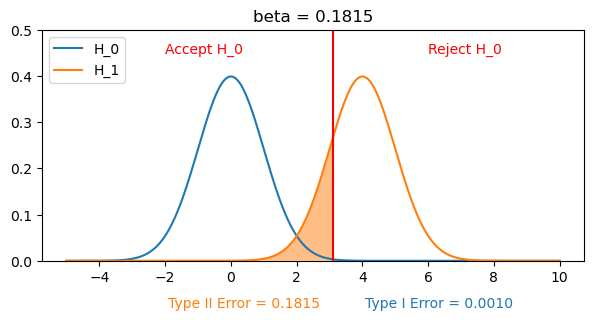

interactive(children=(FloatSlider(value=0.001, description='alpha', max=0.5, readout_format='.4f', step=1e-05)…

In [4]:
from ipywidgets import interact, FloatSlider

alpha_slider = FloatSlider(min=0, max=0.5, step=0.00001, value=0.001, readout_format='.4f')

out = interact(plot_decision_boundary, alpha = alpha_slider)


### Likelihood Ratio Test

Suppose $X$ was a discrete variable. Then the probability of observing $x$ under each hypothesis is equal to the likelihood function of each model evaluated at $x$. So a measure of which hypothesis is "more likely" is the ratio of the likelihoods and we can design a test statistic based on it:

$$\Lambda(X) = \frac{\mathcal{L}(\theta_0|X)}{\mathcal{L}(\theta_1|X)}$$

and a test, with a significance level $\alpha$:

Reject $\mathcal{H_0}$:$\hspace{38pt}\Lambda(x)\le c$,

Do not reject $\mathcal{H_0}$:$\hspace{10pt}$ $\Lambda(x)> c$,

where $c$ is chosen so that $P(\Lambda(X)\le c|\mathcal{H_0}) = \alpha$.

Such a test can be specified also for continuous distributions. 

:::{note}
It turns out that *the likelihood ratio test is the most powerful test among the tests of significance level $\alpha$*! Many of the popular tests in statistics are likelihood ratio tests.
:::

## Noise Detection Example

We want to determine whether noise is present in the environment. If there no noise, we assume that the distribution of the ambient noise follows a Gaussian distribution. If there is ship noise, the distribution will be skewed. The alternative hypothesis is that the observations are from skew normal distribution. 


$\mathcal{H_0}: X \sim \mathcal{N}(\mu_0, \sigma_0^2)$
 
$\mathcal{H_1}: X \sim skew\mathcal{N}(\alpha_1, scale_1, loc_1)$


In [5]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&confirm=t&id=1466snzjsXPVTlKnzkkCkdOgwoO5Zvutq' -O background.wav

--2025-05-16 12:15:28--  https://docs.google.com/uc?export=download&confirm=t&id=1466snzjsXPVTlKnzkkCkdOgwoO5Zvutq
Resolving docs.google.com (docs.google.com)... 142.251.33.78, 2607:f8b0:400a:804::200e
Connecting to docs.google.com (docs.google.com)|142.251.33.78|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1466snzjsXPVTlKnzkkCkdOgwoO5Zvutq&export=download [following]
--2025-05-16 12:15:28--  https://drive.usercontent.google.com/download?id=1466snzjsXPVTlKnzkkCkdOgwoO5Zvutq&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.33.97, 2607:f8b0:400a:80b::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.33.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5759054 (5.5M) [audio/wav]
Saving to: ‘background.wav’

background.wav      100%[===================>]   5.49M  10.8MB/s    in 0.5s    

2025-0

In [6]:
from scipy.io import wavfile
# reading background data
samplerate, sound = wavfile.read('background.wav')

import numpy as np
# first we split small intervals of 0.1s
sound_split = np.split(sound[:(len(sound)-len(sound)%samplerate)], len(sound[:(len(sound)-len(sound)%samplerate)])/samplerate*10)
# we calculate RMS for each interval
RMS_split = [np.sqrt(np.mean(np.square(group.astype('float')))) for group in sound_split]
X = 20*np.log10(RMS_split)

We will follow the following procedure:

1. Set a significance level
2. Calculate the test statistic
3. Determine the critical region based on alpha and the test statistic
4. Make decision

**1. Significance level**

Despite some acceptance within specific fields of what a reasonable significance level is, it is important to interpret what it means in terms of the context. In this case, it means if we perform the experiment repeatedly, we will on average wrongly predict noise when it is not present $100\alpha\%$ of the time. If we would like to detect times when ships were present in a protected zone in which they are not supposed to be present, and we would like to use the detections to notify officials if a ship is present, we would prefer to be really certain that there is a violation before doing that. If we are studying the effect of noise on a another process, we could possibly incorporate that error in the follow up analysis, and it is less important about the specific choice, as long as it is small and accounted for.

In [7]:
alpha = 0.001

**2. Likelihood-ratio test statistic**


We will evaluate the likelihood ratio of the two distributions with a set of fixed parameters.

In [8]:
import scipy.stats as stats

mean = 42
std = 1.8

In [9]:
a = 3
scale = 2
loc = 40.2

In [10]:
gaussian_likelihood = stats.norm.pdf(X, loc=mean, scale=std)
skewnorm_likelihood = stats.skewnorm.pdf(X, a=a, scale=scale, loc=loc)

We can hypothesize that the skew-normal model is more probable. But we need to test this properly.

We compute the log of the likelihood ratio test statistic:

In [11]:
logL_ratio = np.sum(np.log(gaussian_likelihood))-np.sum(np.log(skewnorm_likelihood))
print(logL_ratio)

-1.6977979556197624


In [12]:
T = logL_ratio

**3. Identify critical region**

We would like to determine the threshold $c$ for which the significance level of the test is $\alpha$. Note this can be done before actually observing the sample. What we need for that is to determine the distribution of the likelihood ratio under null hypothesis distribution: in this case the Gaussian distribution with the pre-specified parameters (in this case we extracted them from the sample but we will treat them as known). 

$P(\Lambda(X)\le c)$ = $\alpha$, where $X \sim \mathcal{N}(\mu_0, \sigma_0)$

Instead of trying to calculate it analytically, we will simulate a set of samples from the Gaussian distribution each of size equal to the size of $X$, evaluate the likelihood ratio on each of them, and calculate the first percentile of those values.

The steps for an individual sample are as follows:

In [13]:
def evaluateLogL_ratio(x):
  gaussian_likelihood = stats.norm.pdf(x, scale=std, loc=mean)
  skewnorm_likelihood = stats.skewnorm.pdf(x, a=a, scale=std, loc=loc)
  logL_ratio = np.sum(np.log(gaussian_likelihood)) - np.sum(np.log(skewnorm_likelihood))
  return(logL_ratio)


In [14]:
# generating 10000 samples of the log likelihood ratio of a sample from the null
test_stat_sample_null = [evaluateLogL_ratio(stats.norm.rvs(mean, std, size=len(X))) for i in range(10000)]

In [15]:
# calculate the threshold at which we reject
c = np.percentile(test_stat_sample_null, alpha*100)
print(c)

145.35333329760104


In [16]:
# calculate the percentile of the test statistic
percentile = stats.percentileofscore(test_stat_sample_null, T, kind='rank')
print(percentile)

0.0


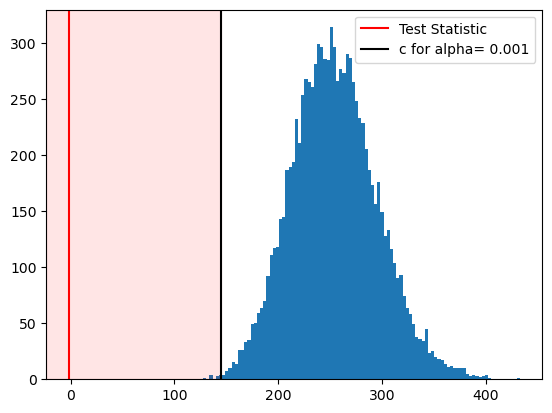

In [17]:
# plot the distribution of the test statistic under null
out = plt.hist(test_stat_sample_null, bins=100)
plt.axvline(T, color="r", label="Test Statistic")
plt.axvline(c, color="k", label=f"c for alpha= {alpha:.3f}")
(left, right) = plt.xlim()
plt.axvspan(left, c, alpha=0.1, color='red')
plt.xlim(left, right)
plt.legend()

*What is the decision?*

```{admonition} Exercise
:class:
Evaluate the power of this test.
```